<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#A-show--strudy-to-insight-fellowship" data-toc-modified-id="A-show--strudy-to-insight-fellowship-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>A show  strudy to insight fellowship</a></span></li></ul></li><li><span><a href="#Toxic-comment-classifier" data-toc-modified-id="Toxic-comment-classifier-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Toxic comment classifier</a></span></li><li><span><a href="#Mohammadmehdi-Ezzatabadipour-(mezzatab)" data-toc-modified-id="Mohammadmehdi-Ezzatabadipour-(mezzatab)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Mohammadmehdi Ezzatabadipour (mezzatab)</a></span></li><li><span><a href="#Preprocessing-and-cleaning-the-data" data-toc-modified-id="Preprocessing-and-cleaning-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preprocessing and cleaning the data</a></span></li><li><span><a href="#Tf-idf-transformation-to-be-fed-in-Multinomial-NB-classifier" data-toc-modified-id="Tf-idf-transformation-to-be-fed-in-Multinomial-NB-classifier-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Tf-idf transformation to be fed in Multinomial NB classifier</a></span></li><li><span><a href="#Multinomial-NB-classifier" data-toc-modified-id="Multinomial-NB-classifier-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Multinomial NB classifier</a></span></li><li><span><a href="#Applying-the-metrics-to-check-the-performance-our-benchmark-model" data-toc-modified-id="Applying-the-metrics-to-check-the-performance-our-benchmark-model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Applying the metrics to check the performance our benchmark model</a></span><ul class="toc-item"><li><span><a href="#Plotting-the-resulted-confusion-matrix-for-tf-idf+Multinomial-NB" data-toc-modified-id="Plotting-the-resulted-confusion-matrix-for-tf-idf+Multinomial-NB-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Plotting the resulted confusion matrix for tf-idf+Multinomial NB</a></span></li></ul></li><li><span><a href="#Naive-classifier,-consider-all-comments-as-non-toxic" data-toc-modified-id="Naive-classifier,-consider-all-comments-as-non-toxic-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Naive classifier, consider all comments as non-toxic</a></span></li><li><span><a href="#Performance-of-naive-classifier-with-confusion-matrix-plot" data-toc-modified-id="Performance-of-naive-classifier-with-confusion-matrix-plot-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Performance of naive classifier with confusion matrix plot</a></span></li><li><span><a href="#Start-the-phase-for-Solution-model,-LSTM-RNN" data-toc-modified-id="Start-the-phase-for-Solution-model,-LSTM-RNN-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Start the phase for Solution model, LSTM-RNN</a></span></li><li><span><a href="#LSTM-Architecture" data-toc-modified-id="LSTM-Architecture-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>LSTM Architecture</a></span></li><li><span><a href="#Fitting-the-model" data-toc-modified-id="Fitting-the-model-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Fitting the model</a></span></li><li><span><a href="#Start-measuring-the-metrics-over-the-performance-of-our-solution-model" data-toc-modified-id="Start-measuring-the-metrics-over-the-performance-of-our-solution-model-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Start measuring the metrics over the performance of our solution model</a></span></li><li><span><a href="#Plotting-confusion-matrix-for-LSTM-(Solution-model)" data-toc-modified-id="Plotting-confusion-matrix-for-LSTM-(Solution-model)-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Plotting confusion matrix for LSTM (Solution model)</a></span><ul class="toc-item"><li><span><a href="#The-End,-Dont-hesitate-to-contact-me--and-give-comments-and-suggestions" data-toc-modified-id="The-End,-Dont-hesitate-to-contact-me--and-give-comments-and-suggestions-13.1"><span class="toc-item-num">13.1&nbsp;&nbsp;</span>The End, Dont hesitate to contact me  and give comments and suggestions</a></span></li></ul></li></ul></div>

## A show  strudy to insight fellowship ## 
# Toxic comment classifier #

# Mohammadmehdi Ezzatabadipour (mezzatab)# 
Contact: Mohammadmehdi Ezzatabadipour (mezzatab)

    Email: mehdi.ezatabadi3@gmail.com
    
        PhD in computational statistical physics 


I have chosen Toxic comment classifier challenge from Kaggle  
The libraries from NLTK, sklearn and Keras are imported for this project. In this section, I lunch the preprocessig section. I tranform each comment into list of words in lowercase, and lemmatized. The stopwords are applied to reduce the size of vocabulary. Prepare pipeline is designed to both clean and preprocess data and do tf-idf tranformations.   

In [ ]:
from time import time
import matplotlib.pyplot as plt
import sklearn
print sklearn.__version__
from sklearn.model_selection import ShuffleSplit, train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn import metrics
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from nltk.corpus import stopwords as sw
from nltk.corpus import wordnet as wn
from sklearn.preprocessing import Normalizer
from pickle import load

from nltk import wordpunct_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import sent_tokenize
from nltk import pos_tag
from sklearn.base import BaseEstimator,TransformerMixin


class NLTKPreprocesor(BaseEstimator,TransformerMixin):
    def __init__(self,stopwords = None,punct = None,lower = True,strip=True):
        self.lower = lower
        self.strip = strip
        self.stopwords = stopwords or set(sw.words('english'))
        self.punct = punct or set(string.punctuation)
        self.lemmatizer = WordNetLemmatizer()
#        self.contractions = load(open('contractions.pickle','rb'))

    def fit(self,X,y=None):
        return self

    def inverse_transform(self,X):
        pass

    def transform(self,X):
        return [list(self.tokenize(doc)) for doc in X]

    def tokenize(self,sDocument):
        document=sDocument.decode('utf-8')
#        doc.strip(" ")
        for sent in sent_tokenize(document):
            for token,tag in pos_tag(wordpunct_tokenize(sent)):
                token = token.lower() if self.lower else token
                token = token.strip() if self.strip else token
                token = token.strip('_') if self.strip else token
                token = token.strip('*') if self.strip else token
                token = token.strip('#') if self.strip else token

                if token in self.stopwords:
                    continue

                if all(char in self.punct for char in token):
                    continue

                if len(token) <= 0:
                    continue

                lemma = self.lemmatize(token,tag)
                yield lemma

    def lemmatize(self,token,tag):
        tag ={
            'N' : wn.NOUN,
            'V' : wn.VERB,
            'R' : wn.ADV,
            'J' : wn.ADJ
        }.get(tag[0],wn.NOUN)
        return self.lemmatizer.lemmatize(token,tag)


def prepare_data(X,X_t):
    preProcess = Pipeline([
        ('NLTKpreprocess', NLTKPreprocesor()),
        ('vectorizer', TfidfVectorizer(
            max_df=0.90,
            max_features=5000,
            encoding='latin1',
            tokenizer=lambda x: x,
            preprocessor=None, lowercase=False))
    ])
    x_train = np.asanyarray(preProcess.fit_transform(X.values).todense())
#    x_valid = np.asanyarray(preProcess.fit_transform(X_v.values).todense())    
    x_test = np.asanyarray(preProcess.transform(X_t.values).todense())

    return x_train,x_test,preProcess


def trim(s):
    """Trim string to fit on terminal (assuming 80-column display)"""
    return s if len(s) <= 80 else s[:77] + "..."

# Preprocessing and cleaning the data #

In [ ]:
if __name__ == '__main__':
    data = pd.read_csv("data/train.csv") ## reading the data from csv file ##
    clf = NLTKPreprocesor()
    procData = clf.transform(data.loc[:, 'comment_text']) ## preprocessing the comments ## 

In [3]:
pData=np.asarray(procData)
print pData.shape[:]
print data.loc[:,'toxic'].shape[:]

(159571,)
(159571,)


 Splitting the data into test section (0.1) and training section (0.9), I simplified the project from multi-label classifier to mono-label classifier just using toxic label. Later the training section is also devided to validation and training sets.  

In [4]:
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
X_train, X_test, y_train, y_test=train_test_split(pData, data.loc[:,'toxic'], shuffle=False, test_size=0.1)
#trainData=data.loc[:int(Length*0.8),'comment_text'] ## Training Data
#validData=data.loc[int(Length*0.8):int(Length*0.9),'comment_text'] ## Validation data 
#tvData=data.loc[:int(Length*0.9),'comment_text'] ## Validation data 
#testData=data.loc[int(Length*0.9):,'comment_text'] ## testing data 

Separating the toxic comments from non-toxic comments for pre-analysis and descriptive statistics 

In [5]:
toxicX_train=[]
NonToxic_train=[]
for i,comment in enumerate(X_train):
    if y_train[i]==1:
        toxicX_train.append(comment)
    else:
        NonToxic_train.append(comment)

Comment length distribution after preprocessing for label and non-labeled comments 

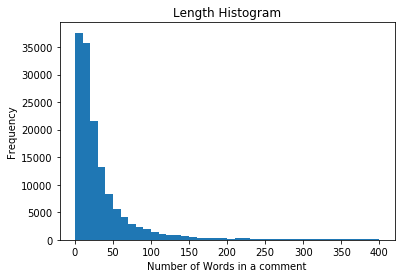

In [6]:
totalNumWords = [len(one_comment) for one_comment in X_train]
plt.hist(totalNumWords,bins = np.arange(0,410,10))#[0,50,100,150,200,250,300,350,400])#,450,500,550,600,650,700,750,800,850,900])
plt.title("Length Histogram")
plt.xlabel("Number of Words in a comment")
plt.ylabel("Frequency")
plt.show()

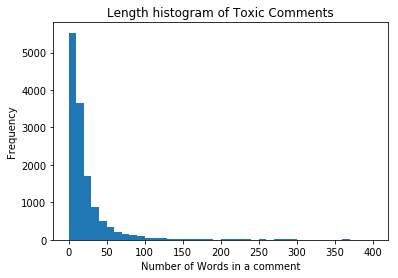

In [7]:
plt.clf()
ToxicNumWords = [len(one_comment) for one_comment in toxicX_train]
plt.hist(ToxicNumWords,bins = np.arange(0,410,10))#[0,50,100,150,200,250,300,350,400])#,450,500,550,600,650,700,750,800,850,900])
plt.title("Length histogram of Toxic Comments")
plt.xlabel("Number of Words in a comment")
plt.ylabel("Frequency")
plt.show()

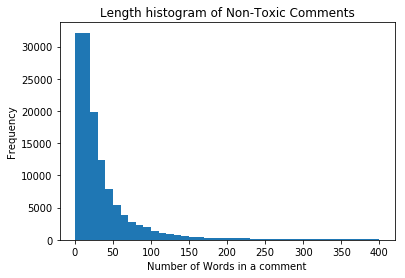

In [8]:
plt.clf()
NonToxicNumWords = [len(one_comment) for one_comment in NonToxic_train]
plt.hist(NonToxicNumWords,bins = np.arange(0,410,10))#[0,50,100,150,200,250,300,350,400])#,450,500,550,600,650,700,750,800,850,900])
plt.xlabel("Number of Words in a comment")
plt.title("Length histogram of Non-Toxic Comments")
plt.ylabel("Frequency")
plt.show()

In [45]:
# putting the toxic and non-toxic comments separated numpy arrays # 
# Printing the number of nont-toxic and toxic comments #
print np.asarray(NonToxicNumWords).sum()
ntoxic_text_train=[]
for x in NonToxic_train:
    x=' '.join(x)
    ntoxic_text_train.append(x.encode('utf-8'))

ntoxic_text_train=np.asarray(ntoxic_text_train)

4774994


In [10]:
print np.asarray(ToxicNumWords).sum()
toxic_text_train=[]
for x in toxicX_train:
    x=' '.join(x)
    toxic_text_train.append(x.encode('utf-8'))

toxic_text_train=np.asarray(toxic_text_train)

397084


In [11]:
print np.asarray(totalNumWords).sum()
text_train=[]
for x in X_train:
    x=' '.join(x)
    text_train.append(x.encode('utf-8'))

text_test=[]
for x in X_test:
    x=' '.join(x)
    text_test.append(x.encode('utf-8'))
text_train=np.asarray(text_train)
text_test=np.asarray(text_test)

5172078


Plotting the pie histogram of imbalanced number of (toxic, non-toxic) comments 

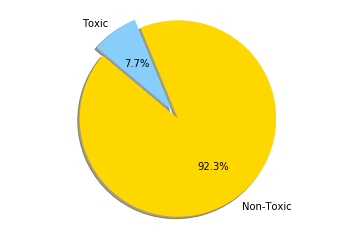

In [12]:
import matplotlib.pyplot as plt
 
# Data to plot
labels ='Non-Toxic', 'Toxic'
#title="Imbalanced classes"
sizes = [4774994, 397084]
colors = ['gold', 'lightskyblue']#, 'lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()


 Importing keras libraries for both tokenizing and LSTM-RNN classification 
 
 Tokenizing the comments 
 
 Later, I printed the most common words for both toxic and non-toxic comments separated. 

In [13]:
from keras.preprocessing.text import Tokenizer
# Any results you write 

from keras.layers import Input, Dense
from keras.models import Model
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.layers import LSTM
from keras.layers import GlobalMaxPool1D
from keras.layers import Dropout
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import ModelCheckpoint

max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(np.asarray(text_train)))

Using TensorFlow backend.


In [49]:
import operator
z=tokenizer.word_counts
sorted_tokens = sorted(z.items(), key=operator.itemgetter(1))
L=len(sorted_tokens)
print "Popular words in non-labeled Comments"
print L
for i in range(L-1,L-20,-1):
    print sorted_tokens[i]

Popular words in non-labeled Comments
164073
('article', 66992)
('page', 51570)
('wikipedia', 43655)
('talk', 36430)
('use', 29616)
('one', 27803)
('make', 27383)
('please', 26999)
('would', 26438)
('edit', 26076)
('like', 25879)
('see', 23014)
('say', 22850)
('think', 22178)
('know', 21594)
('source', 21069)
('get', 19747)
('go', 19283)
('also', 18578)


In [15]:
ToxicTokenizer = Tokenizer(num_words=max_features)
ToxicTokenizer.fit_on_texts(list(np.asarray(toxic_text_train)))

In [16]:
tz=ToxicTokenizer.word_counts
toxic_sorted_tokens = sorted(tz.items(), key=operator.itemgetter(1))

In [48]:
tL=len(toxic_sorted_tokens)
#print L
print "Popular words in Toxic Comments"
for i in range(tL-1,tL-20,-1):
    print toxic_sorted_tokens[i]

Popular words in Toxic Comments
('fuck', 10357)
('suck', 4433)
('go', 3462)
('wikipedia', 3411)
('shit', 3399)
('like', 3358)
('u', 3170)
('nigger', 3035)
('get', 2773)
('page', 2314)
('know', 2248)
('gay', 2175)
('bitch', 2156)
('hate', 2151)
('die', 2107)
('faggot', 2005)
('moron', 1896)
('make', 1801)
('fucking', 1764)


In [18]:
NonToxicTokenizer = Tokenizer(num_words=max_features)
NonToxicTokenizer.fit_on_texts(list(np.asarray(ntoxic_text_train)))

In [19]:
ntz=NonToxicTokenizer.word_counts
ntoxic_sorted_tokens = sorted(ntz.items(), key=operator.itemgetter(1))

In [50]:
nL = len(ntoxic_sorted_tokens)
print "Popular words in Non-Toxic Comments"
print L
for i in range(nL-1,nL-20,-1):
    print ntoxic_sorted_tokens[i]

Popular words in Non-Toxic Comments
164073
('article', 65271)
('page', 49256)
('wikipedia', 40244)
('talk', 34863)
('use', 28817)
('one', 26354)
('please', 26157)
('make', 25582)
('would', 25505)
('edit', 24758)
('like', 22521)
('see', 21981)
('say', 21278)
('think', 20789)
('source', 20577)
('know', 19346)
('also', 17918)
('add', 17097)
('get', 16974)


In [52]:
#print "Toxic Comments" '\t    \t' "Non-Toxic Comments"
#for i in range(1,20):
#    print(ntoxic_sorted_tokens[nL-i],'       ',toxic_sorted_tokens[L-i])

# Tf-idf transformation to be fed in Multinomial NB classifier #

In [22]:
list_tokenized_train = tokenizer.texts_to_sequences(text_train) 
list_tokenized_test = tokenizer.texts_to_sequences(text_test)   

In [23]:
#from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(
            max_df=0.90,
            max_features=20000,
            encoding='latin1',
            preprocessor=None, lowercase=False)
tfidf.fit(list(np.asarray(text_train)))
tfidf_text_train =tfidf.transform(list(np.asarray(text_train)))
tfidf_text_test =tfidf.transform(list(np.asarray(text_test)))
print tfidf_text_train.shape[:]
print tfidf_text_test.shape[:]
#print ZZ[1,1]

(143613, 20000)
(15958, 20000)


# Multinomial NB classifier #

In [24]:
from sklearn.naive_bayes import MultinomialNB
nbClf=MultinomialNB()
nbClf.fit(tfidf_text_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [55]:
tfidfPredicted=nbClf.predict(tfidf_text_test) ## Predicting the labels of test comments ##

# Applying the metrics to check the performance our benchmark model #

In [26]:
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, fbeta_score  
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from functools import partial
from collections import defaultdict 

METRICS = {
    "confusion_matrix":confusion_matrix,
    "hamming_loss": hamming_loss,
    "accuracy": accuracy_score,
    "precision": precision_score,     
    "recall": recall_score, 
    "f1": f1_score,
    "f2": partial(fbeta_score, beta=2),
}

records = defaultdict(dict)
list_classes=[]
list_classes.append("toxic")
for metric_name,metric in METRICS.items():
    for j in range(len(list_classes)):
        records[metric_name][list_classes[j]]=metric(y_test,tfidfPredicted) ## Measuring the metrics ##

In [56]:
# Pretty printing of the metrics #
from pprint import pprint
pprint(dict(records))

{'accuracy': {'toxic': 0.94667251535280106},
 'confusion_matrix': {'toxic': array([[14365,    50],
       [  801,   742]])},
 'f1': {'toxic': 0.63554603854389724},
 'f2': {'toxic': 0.53273980470993687},
 'hamming_loss': {'toxic': 0.0533274846471989},
 'precision': {'toxic': 0.93686868686868685},
 'recall': {'toxic': 0.48088139987038236}}


## Plotting the resulted confusion matrix for tf-idf+Multinomial NB ## 

In [29]:
#print records["confusion_matrix"]["toxic"]
plt.clf()
plt.figure()
plot_confusion_matrix(records["confusion_matrix"]["toxic"],["Non-Toxic","Toxic"])

Confusion matrix, without normalization
[[14365    50]
 [  801   742]]


Normalized confusion matrix
[[ 0.99653139  0.00346861]
 [ 0.5191186   0.4808814 ]]


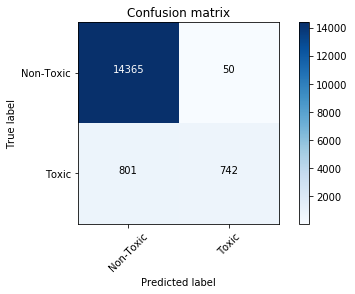

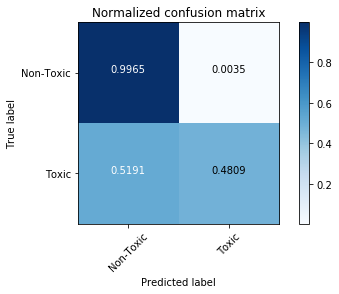

In [30]:
# I have used a code suggested in sklearn for plotting confusion matrix, check the  plot_confusion_matrix.py in this folder
# The link is documented inside its file 
from plot_confusion_matrix import plot_confusion_matrix
plt.figure()
plot_confusion_matrix(records["confusion_matrix"]["toxic"],["Non-Toxic","Toxic"],normalize=True,title='Normalized confusion matrix')
plt.show()

# Naive classifier, consider all comments as non-toxic # 

In [32]:
naivePred=np.zeros(tfidfPredicted.shape[:])
tfidfPredicted.shape[:]
naiveRecords = defaultdict(dict)
for metric_name,metric in METRICS.items():
    for j in range(len(list_classes)):
        naiveRecords[metric_name][list_classes[j]]=metric(y_test,naivePred)

/Users/mezzatab/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mezzatab/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


# Performance of naive classifier with confusion matrix plot # 

In [33]:
from pprint import pprint
pprint(dict(naiveRecords))

{'accuracy': {'toxic': 0.90330868529890962},
 'confusion_matrix': {'toxic': array([[14415,     0],
       [ 1543,     0]])},
 'f1': {'toxic': 0.0},
 'f2': {'toxic': 0.0},
 'hamming_loss': {'toxic': 0.096691314701090367},
 'precision': {'toxic': 0.0},
 'recall': {'toxic': 0.0}}


Confusion matrix, without normalization
[[14415     0]
 [ 1543     0]]


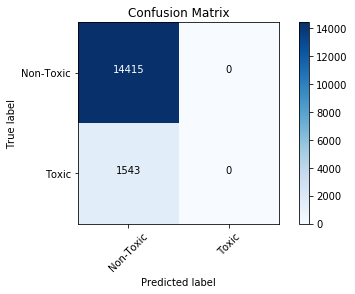

In [34]:
plt.clf()
plt.figure()
plot_confusion_matrix(naiveRecords["confusion_matrix"]["toxic"],["Non-Toxic","Toxic"],normalize=False,title='Confusion Matrix')
plt.show()

# Start the phase for Solution model, LSTM-RNN #
Start padding the comments with fixed size of 100, chosen from comment length distribution 

In [35]:
maxlength=100
paddedTrain=pad_sequences(list_tokenized_train,maxlen=maxlength) # Padding the traning section
paddedTest=pad_sequences(list_tokenized_test,maxlen=maxlength) # Padding the testing section 

# LSTM Architecture #

In [36]:
# Importing LSTM Classifier,
#I have written a function for making the architecture using the given inputs for LSTM classifier #
from LSTM_Classifier import LSTM_Classifier 
checkCLF=LSTM_Classifier(embDim=128, lstmDim=60, hidDim=50, outDim=1, maxlen=100)
checkCLF.summary()
Path='saved_models/Ezzat/weights.best.RNN.' # I saved the trained weights for extended use and transfer learning # 
checkpoint=ModelCheckpoint(filepath=Path, 
                               verbose=1, save_best_only=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
lstm_layer (LSTM)            (None, 100, 60)           45360     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 60)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                3050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total para

# Fitting the model #

In [37]:
epochs=5
history=checkCLF.fit(paddedTrain, y_train, validation_split=0.1,
                epochs=epochs,
                batch_size=256,
                callbacks=[checkpoint], verbose=1,
                )

Train on 129251 samples, validate on 14362 samples
Epoch 1/5
129251/129251 [==============================] - 265s - loss: 0.1830 - acc: 0.9390 - val_loss: 0.1104 - val_acc: 0.9602
Epoch 2/5
129251/129251 [==============================] - 265s - loss: 0.0965 - acc: 0.9641 - val_loss: 0.1084 - val_acc: 0.9604
Epoch 3/5
129251/129251 [==============================] - 274s - loss: 0.0791 - acc: 0.9704 - val_loss: 0.1173 - val_acc: 0.9571
Epoch 4/5
129251/129251 [==============================] - 265s - loss: 0.0637 - acc: 0.9765 - val_loss: 0.1322 - val_acc: 0.9595
Epoch 5/5
129251/129251 [==============================] - 270s - loss: 0.0510 - acc: 0.9817 - val_loss: 0.1443 - val_acc: 0.9547


In [ ]:
## Plotting the learning curve ## 
plt.clf()
val_loss_Curve=[]
#a0_
a1,=plt.plot(history.history['val_loss'],label='val_loss')
a2,=plt.plot(history.history['loss'],label='loss') 
#plt.title("Encoded Dimention="+"32")
plt.xlabel("epoch")
plt.ylabel("Loss: binary_crossentrop")
plt.legend(handles=[a1,a2])
#    plt.legend(str(2+2*i)) #HillllO")    
plt.show()    

In [98]:
BestTrainPred=checkCLF.predict(paddedTrain) ## Predicting the results for test and training section using trained LSTM Classifier ##
BestTestPred=checkCLF.predict(paddedTest)

In [101]:
## binary formatting the probability predictions ## 
# Setting the threshhold 0.5 #
BinaryTrainPred=np.zeros(BestTrainPred.shape[:])
BinaryTestPred=np.zeros(BestTestPred.shape[:])

for i in range(len(BestTrainPred)):
    for j in range(1):
        if BestTrainPred[i,j] >= 0.5:
            BinaryTrainPred[i,j]=1
        else:
            BinaryTrainPred[i,j]=0
            
for i in range(len(BestTestPred)):
    for j in range(1):
        if BestTestPred[i,j] >= 0.5:
            BinaryTestPred[i,j]=1
        else:
            BinaryTestPred[i,j]=0

# Start measuring the metrics over the performance of our solution model #

In [273]:
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, fbeta_score  
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
#from sklearn.metrics import jaccard_similarity_score
from functools import partial
from collections import defaultdict 

METRICS = {
    "confusion_matrix":confusion_matrix,
    "hamming_loss": hamming_loss,
    "accuracy": accuracy_score,
    "precision": precision_score,     
    "recall": recall_score, 
    "f1": f1_score,
    "f2": partial(fbeta_score, beta=2),
}

records = defaultdict(dict)
list_classes=[]
list_classes.append("toxic")
for metric_name,metric in METRICS.items():
    records[metric_name][list_classes[0]]=metric(y_test,BinaryTestPred[:,0])
    

In [274]:
from pprint import pprint
pprint(dict(records))

{'accuracy': {'toxic': 0.9479258052387517},
 'confusion_matrix': {'toxic': array([[14034,   381],
       [  450,  1093]])},
 'f1': {'toxic': 0.72456082200861782},
 'f2': {'toxic': 0.71475281192780538},
 'hamming_loss': {'toxic': 0.052074194761248277},
 'precision': {'toxic': 0.74151967435549526},
 'recall': {'toxic': 0.70836033700583279}}


# Plotting confusion matrix for LSTM (Solution model) #

Confusion matrix, without normalization
[[14034   381]
 [  450  1093]]


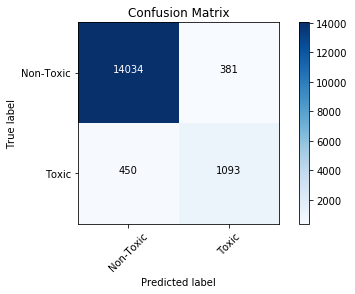

In [275]:
plt.clf()
plt.figure()
plot_confusion_matrix(records["confusion_matrix"]["toxic"],["Non-Toxic","Toxic"],normalize=False,title='Confusion Matrix')
plt.show()

## The End, Dont hesitate to contact me  and give comments and suggestions ##
Mohammadmehdi Ezzatabadipour (mezzatab)
Contact Inf: 

    Email: mehdi.ezatabadi3@gmail.com
    
        PhD in computational physics 